# Fourier filters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.seterr(divide='ignore', invalid='ignore')  # disable divide by zero warnings
from ipywidgets import widgets

## Fourier space

### 1D signal

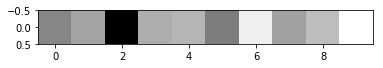

In [15]:
ary = np.random.randn(10)
plt.imshow(np.expand_dims(ary, axis=0), cmap='gray')
plt.show()

In [20]:
ft_ary = np.fft.fft(ary)
freq = np.fft.fftfreq(ft_ary.size)
print(freq)

[ 0.   0.1  0.2  0.3  0.4 -0.5 -0.4 -0.3 -0.2 -0.1]


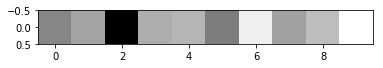

In [17]:
res = np.zeros(10)
for u, amplitude, phase in zip(freq, np.absolute(ft_ary), np.angle(ft_ary)):
    res += amplitude/10 * np.cos(u*2*np.pi*np.arange(10) + phase)
plt.imshow(np.expand_dims(res, axis=0), cmap='gray')
plt.show()

### 2D image

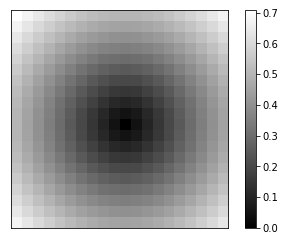

In [27]:
shape = (20,20)
x = np.fft.fftfreq(shape[0])
y = np.fft.fftfreq(shape[1])
X,Y = np.meshgrid(x,y, indexing='ij')
freq_2d = np.sqrt(X**2 + Y**2)
shift_freq_2d = np.fft.fftshift(freq_2d)
plt.imshow(shift_freq_2d, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.colorbar()
plt.show()

If our sampling rate is e.g. 1 A/pixel, our frequency at each point in the fourier spectrum is 1/freqency * sampling rate. One can see as an example that the highest resolution (nyquist) in the below image is 2 Angstrom, the lowest is 20 Angstrom.

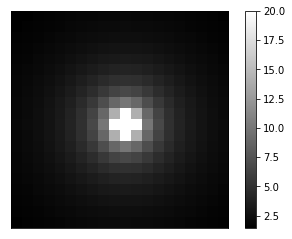

In [28]:
sampling_rate = 1  # A/pixel
shift_freq_2d_Angstrom = 1/shift_freq_2d * sampling_rate
plt.imshow(shift_freq_2d_Angstrom, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.colorbar()
plt.show()

### N dimensions

In [39]:
def frequencies(shape):
    """
    Creates a frequency map for a multidimensional numpy array with the same dimensions.
    The frequency units are in spacial frequency units. (i.e. nyquist = 0.5)
    """
    meshgrids = np.meshgrid(*[np.fft.fftfreq(i) for i in shape], indexing='ij')
    return np.sqrt(np.sum([i**2 for i in meshgrids], axis=0))

#### Example

In [40]:
image_shape = (300,500)
freq = frequencies(image_shape)

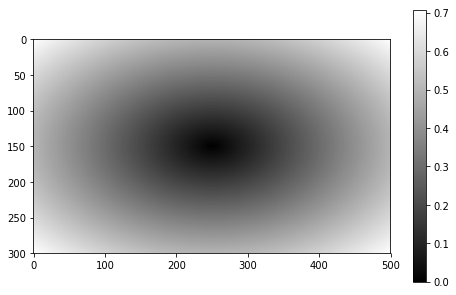

In [41]:
plt.figure(figsize=(8,5))
plt.imshow(np.fft.fftshift(freq), cmap='gray')
plt.colorbar()
plt.show()

## Damage filter

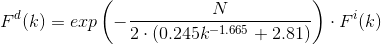

*Grant, Timothy and Grigorieff, Nikolaus: Measuring the optimal exposure for single particle cryo-EM using a 2.6 Å reconstruction of rotavirus VP6* <https://elifesciences.org/articles/06980>

[comment]: <> (F^d(k)=exp\left(-\frac{N}{2\cdot (0.245k^{-1.665}+2.81)}\right)\cdot F^i(k))

*k: spacial frequency (1/A)*

*N: cumulative electron exposure (e/A²)*


In [42]:
def damage_filter_function(k, N):
    """
    Dose dependent frequency filter.
    Grant, Timothy and Grigorieff, Nikolaus: Measuring the optimal exposure for single particle cryo-EM using a 2.6 Å reconstruction of rotavirus VP6
    :param k: spacial frequency in 1/A
    :param N: cumulative electron exposure in e/A²
    :return: attenuated frequency
    """
    return np.exp(-N / (2 * (0.245 * np.power(k, -1.665) + 2.81)))

In [48]:
n_samples = 300
freq = frequencies((n_samples,))[:n_samples//2]

In [55]:
@widgets.interact(pixel_size=(0.5,10,0.1), cumulative_dose=(0,100,1))
def plot_freq_dependent_damage_filter(pixel_size=1, cumulative_dose=10):
    freq_A = freq / pixel_size
    plt.plot(freq_A, damage_filter_function(freq_A, cumulative_dose))
    plt.show()

A Jupyter Widget

### Frequency filter

*References:*
* https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.ndimage.filters.gaussian_filter.html
* https://stackoverflow.com/questions/29920114/how-to-gauss-filter-blur-a-floating-point-numpy-array